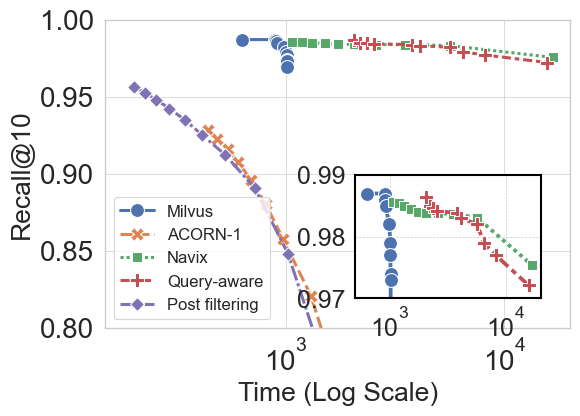

In [142]:
#Trip Click
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Set a larger default font size for all plot elements
# This helps make everything more readable initially
# plt.rcParams.update({'font.size': 14}) # Optional: set a global default

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            # Calculate QPS (Queries Per Second) as 1 / Time (assuming Time is in seconds per query)
            # Time here seems to be total time, so we'll use a placeholder variable as QPS is better for a log scale.
            # Assuming 'Time' is actually latency (ms) and converting to QPS (1000/Time) for the log scale label.
            # For now, let's keep 'Time' on the axis as per your original code, but use a larger font for the label.
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Data (kept the same)
schemes = {
    "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1018.3, 1015.9, 1014.3, 1011.1, 1010.5, 988.2, 919.0, 903.5, 899.8, 635.9],
        "Recall": [0.969, 0.973, 0.974, 0.977, 0.979, 0.982, 0.985, 0.986, 0.987, 0.987]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4803, 1898.05, 1305.79, 976.261, 811.796, 698.071, 605.344, 543.929, 487.062, 443.271],
        "Recall": [0.5010, 0.7480, 0.8208, 0.8572, 0.8803, 0.8958, 0.9074, 0.9161, 0.9225, 0.9281]
    },
    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [16704.7, 5626.37, 3506.85, 2600.3, 2059.95, 1733.83, 1519.29, 1320.1, 1191.67, 1069.68],
        "Recall": [0.9754, 0.9831, 0.9837, 0.9838, 0.9839, 0.9840, 0.9845, 0.9850, 0.9855, 0.9857] 
    },
    "Query-aware":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    },
    "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [2783, 1026, 724, 529, 415, 347, 295, 257, 228, 204],
        "Recall": [0.6608, 0.8480, 0.8906, 0.9123, 0.9252, 0.9348, 0.9422, 0.9478, 0.9524, 0.9561]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(6, 4)) 

# Set preferred font sizes
LABEL_FONTSIZE = 19
TICK_FONTSIZE = 20
LEGEND_FONTSIZE =12
LINE_WIDTH = 2.2
MARKER_SIZE = 10

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(150, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/TripClickPoint.pdf", format="pdf", bbox_inches="tight")

plt.show()

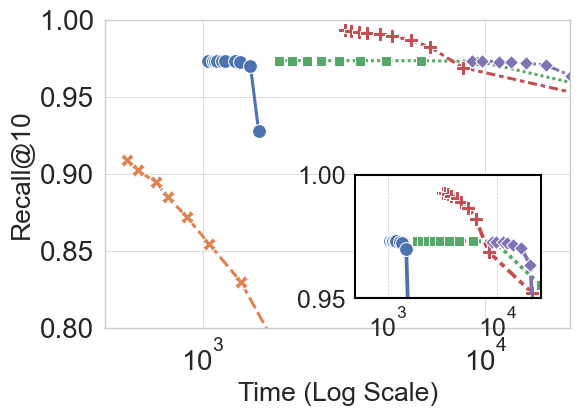

In [143]:
#Sift 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1573.84, 1471.59, 1348.19, 1297.04, 1196.76, 1171.55, 1124.75, 1106.69, 1083.48, 1043.29],
        "Recall": [0.9275, 0.9699, 0.9724, 0.9729, 0.9731, 0.9732, 0.9732, 0.9733, 0.9733, 0.9733]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4415, 0.7054, 0.7881, 0.8299, 0.8543, 0.8718, 0.8845, 0.8944, 0.9022, 0.9085]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [24937.7, 9523.81, 5934.72, 4440.5, 3586.8, 3022.97, 2626.74, 2329.92, 2069.54, 1862.89],
        "Recall": [0.9552, 0.9728, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733] 
    },

     "Query-aware":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [23980, 23309, 22675, 20080, 16393, 13966, 12363, 11173, 9756, 8960],
        "Recall": [0.1641, 0.6422, 0.9101, 0.9636, 0.9704, 0.9717, 0.9723, 0.9727, 0.9729, 0.9730]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(6, 4)) 

# Set preferred font sizes
LABEL_FONTSIZE = 19
TICK_FONTSIZE = 20
LEGEND_FONTSIZE =12
LINE_WIDTH = 2.2
MARKER_SIZE = 10

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.95, 1)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/SIFT.pdf", format="pdf", bbox_inches="tight")

plt.show()


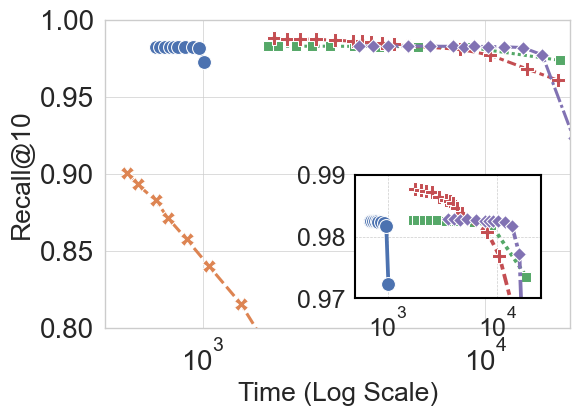

In [147]:
#PAPER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1011.7, 967.7, 919.9, 860.8, 816.9, 788.2, 764.5, 732.3, 705.6, 680.9],
        "Recall": [0.9723, 0.9817, 0.9822, 0.9824, 0.9824, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4802, 0.7085, 0.7784, 0.8156, 0.8398, 0.8572, 0.8709, 0.8827, 0.8929, 0.9004]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [18421.5, 8818.34, 5760.37, 4215.85, 3417.63, 2809.78, 2422.48, 2131.29, 1843.32, 1694.63],
        "Recall": [0.9735, 0.9819, 0.9824, 0.9825, 0.9826, 0.9827, 0.9827, 0.9827, 0.9827, 0.9827] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [18055, 14030, 10423, 8124, 5333, 4759, 4310, 3922, 3668, 3412, 2942, 2513, 2209, 1988, 1786],
        "Recall": [0.9606, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [24814, 25380, 20576, 15924, 13587, 11696, 10204, 9115, 8380, 7671, 6356, 5315, 4530, 4016, 3563],
        "Recall": [0.1643, 0.6457, 0.9230, 0.9771, 0.9818, 0.9823, 0.9825, 0.9826, 0.9825, 0.9826, 0.9827, 0.9828, 0.9827, 0.9828, 0.9828]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(6, 4)) 

# Set preferred font sizes
LABEL_FONTSIZE = 19
TICK_FONTSIZE = 20
LEGEND_FONTSIZE =12
LINE_WIDTH = 2.2
MARKER_SIZE = 10

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/Paper.pdf", format="pdf", bbox_inches="tight")

plt.show()



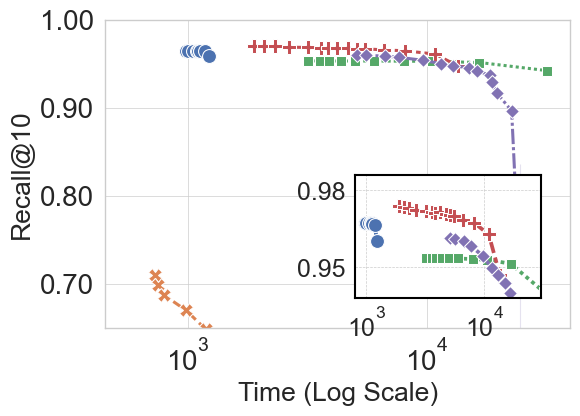

In [145]:

#BIER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1,  1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.9586, 0.9638, 0.9641, 0.9643, 0.9644, 0.9644, 0.9644, 0.9644, 0.9644, 0.9645]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6172.84, 3311.26, 2060.44, 1632.21, 1327.43, 1184.83, 981.033, 797.024, 752.257, 727.802],
        "Recall": [0.229, 0.4369, 0.5274, 0.5853, 0.6227, 0.6482, 0.6697, 0.6865, 0.6987, 0.7101]
    },

   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [31914.9, 16666.7, 10563.4, 8064.52, 6000, 5000, 4373.18, 3886.01, 3562.95, 3191.49],
        "Recall": [0.942, 0.9512, 0.9525, 0.9527, 0.9529, 0.9529, 0.9529, 0.9529, 0.953, 0.953] 
    },

     "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [13494, 10870, 8152, 6617, 5535, 5119, 4702, 4225, 3846, 3614, 3191, 2655, 2308, 2087, 1883],
        "Recall": [0.9475, 0.9607, 0.9645, 0.9655, 0.9668, 0.9669, 0.9672, 0.9679, 0.9676, 0.9681, 0.9683, 0.9686, 0.9694, 0.9695, 0.9701]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 24590, 24590, 22727, 19737, 18750,18519, 16304, 15000, 12931, 11538, 9677, 7653, 6696, 5576, 5119],
        "Recall": [0.5733, 0.8353, 0.8963, 0.9163, 0.9287, 0.9367, 0.9416, 0.945, 0.9477, 0.9499, 0.9537, 0.9571, 0.9585, 0.9593, 0.9597]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(6, 4)) 

# Set preferred font sizes
LABEL_FONTSIZE = 19
TICK_FONTSIZE = 20
LEGEND_FONTSIZE =12
LINE_WIDTH = 2.2
MARKER_SIZE = 10

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.65, 1.0)
ax.set_xlim(450, 4e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.94, 0.98)
axins.set_xlim(800, 3e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/BIER.pdf", format="pdf", bbox_inches="tight")

plt.show()




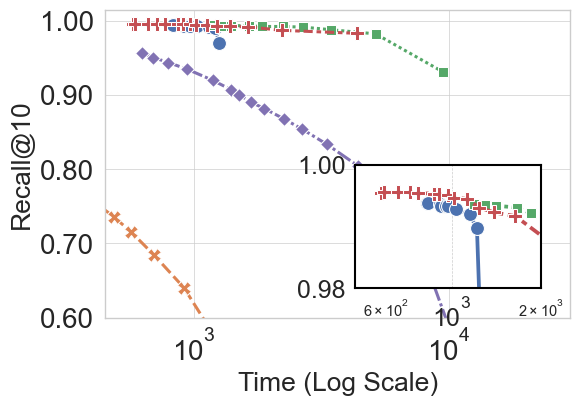

In [146]:

#YOUTUBE CATEGORY

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1257.7, 1215.9, 1148.4, 1031.1, 970.7, 958.7, 919.3, 910.2, 832.4, 827.0],
        "Recall": [0.9693, 0.9897, 0.992, 0.9928, 0.9934, 0.9934, 0.9934, 0.9936, 0.9938, 0.9938]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [3213.3, 1283.19, 915.549, 700.483, 568.071, 487.19, 419.227, 352.691, 324.203, 304.622],
        "Recall": [0.3329, 0.5604, 0.6403, 0.684, 0.7155, 0.7354, 0.7528, 0.7676, 0.7798, 0.7915]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9508.2, 5178.57, 3473.05, 2691.42, 2239.38, 1847.13, 1654.78, 1407.77, 1290.32, 1192.19],
        "Recall": [0.931, 0.9822, 0.9878, 0.9913, 0.9922, 0.9922, 0.9931, 0.9934, 0.9935, 0.9937] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4377, 2214, 1641, 1391, 1237, 1126, 1019, 969, 906, 870, 771, 720, 660, 591, 577],
        "Recall": [0.983, 0.987, 0.9917, 0.9923, 0.9931, 0.9945, 0.9947, 0.9951, 0.9953, 0.9953, 0.9955, 0.9956, 0.9956, 0.9956, 0.9954]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        
        "Time": [ 12083, 6864, 4414, 3333, 2661, 2257, 1896, 1674, 1510, 1406, 1186, 946, 797, 695, 628],
        "Recall": [0.5114, 0.7433, 0.8043, 0.8334, 0.854, 0.8678, 0.8816, 0.8903, 0.9003, 0.9069, 0.9198, 0.9345, 0.9436, 0.9504, 0.9564]
    }
}


df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(6, 4)) 

# Set preferred font sizes
LABEL_FONTSIZE = 19
TICK_FONTSIZE = 20
LEGEND_FONTSIZE =12
LINE_WIDTH = 2.2
MARKER_SIZE = 10

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.6, 1.015)
ax.set_xlim(450, 3e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.98, 1)
axins.set_xlim(470, 2e3)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/YoutubeCategory.pdf", format="pdf", bbox_inches="tight")

plt.show()








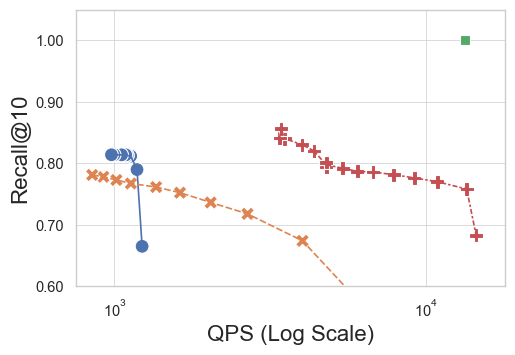

In [52]:
# paper corelation 10
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1,  1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.6646, 0.7895, 0.8115, 0.8115, 0.8125, 0.8125, 0.8135, 0.8135, 0.8136, 0.8136]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [8403.36, 4016.06, 2673.8, 2036.66, 1623.38, 1360.54, 1128.67, 1014.2, 920.81, 848.176],
        "Recall": [0.4989, 0.6735, 0.7174, 0.736, 0.7519, 0.7611, 0.7669, 0.7726, 0.7778, 0.7808]
    },

    "Pre filtering":  {
        "Value": [20],
        "Time": [ 13333.33],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14492.75,13513.51, 10869.57, 9174.31, 7874.02, 6756.76, 6024.10, 5405.41, 4784.69, 4784.69, 4366.81, 4000.00, 3521.13, 3389.83, 3424.66],
        "Recall": [0.6826, 0.7578, 0.7698, 0.776, 0.7812, 0.7856, 0.7865, 0.7917, 0.7936, 0.801, 0.82, 0.83, 0.84, 0.841, 0.856]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.60, 1.05)
ax.set_xlim(750, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
# axins = inset_axes(ax, width="40%", height="45%", loc='upper left', borderpad=2)
# sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
# sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

# axins.set_xscale("log")
# axins.set_ylim(0.65, 0.88)
# axins.set_xlim(800, 2.5e4)
# axins.grid(True, linestyle="--", linewidth=0.5)
# axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_83636/2037806595.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


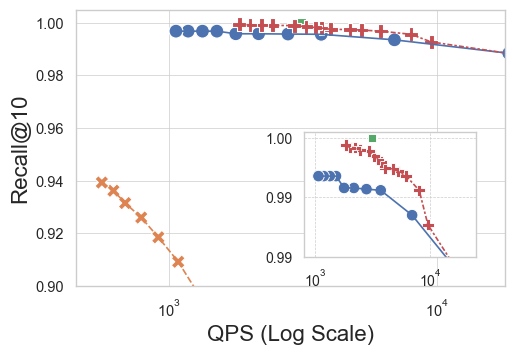

In [53]:
#Co relation 100
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [18518.5, 6944.44, 3703.7, 2785.52, 2164.5, 1779.36, 1512.86, 1336.9, 1182.03, 1064.96],
        "Recall": [0.9884, 0.9935, 0.9956, 0.9957, 0.9958, 0.9958, 0.9968, 0.9968, 0.9968, 0.9968]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4184.1, 2450.98, 1808.32, 1335.11, 1085.78, 915.751, 790.514, 688.705, 622.665, 563.698],
        "Recall": [0.5931, 0.8197, 0.8718, 0.8946, 0.9092, 0.9185, 0.926, 0.9315, 0.9362, 0.9393]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 3105.59],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [55555.6, 9523.81, 8000.0, 6172.84, 5235.60, 4739.34, 4016.06, 3703.70, 3521.13, 3246.75, 2941.18, 2439.02, 2217.29, 2012.08, 1834.86],
        "Recall": [0.9811, 0.9927, 0.9956, 0.9968, 0.9972, 0.9974, 0.9975, 0.9980, 0.9982, 0.9985, 0.9989, 0.9990, 0.9992, 0.9992, 0.9994]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(450, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.99,1.0005)
axins.set_xlim(800, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_83636/3106912548.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


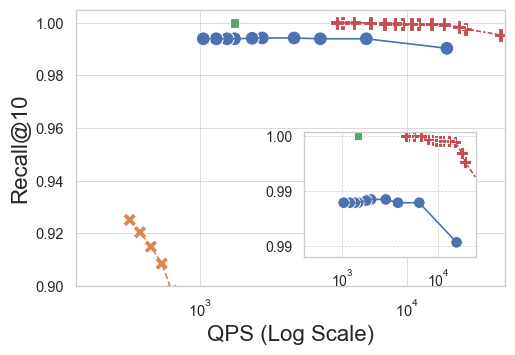

In [54]:
#paper corelation 200
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15625, 6369.43, 3816.79, 2849, 2000, 1785.71, 1468.43, 1351.35, 1197.6, 1036.27],
        "Recall": [0.9903, 0.9939, 0.9939, 0.9942, 0.9942, 0.9941, 0.9939, 0.9939, 0.9939, 0.9939]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4310.34, 1766.78, 1430.62, 1041.67, 874.126, 729.927, 652.742, 578.369, 512.295, 456.621],
        "Recall": [.5043, 0.7517, 0.8294, 0.8672, 0.8872, 0.8982, 0.9085, 0.9149, 0.9204, 0.9251]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 1468.4],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [37037.04, 28474.58, 19230.77, 17857.14, 15151.52, 13157.89, 11363.64, 10526.32, 9523.81, 8771.93, 7812.5, 6666.67, 5555.56, 4901.96, 4587.16],
        "Recall": [0.9950,0.9954, 0.9976, 0.9984, 0.9994, 0.9995, 0.9995, 0.9995, 0.9995, 0.9996, 0.99964, 0.99996, 0.99997, 0.99998, 0.99998]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.989,1.0003)
axins.set_xlim(400, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_83636/548518810.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


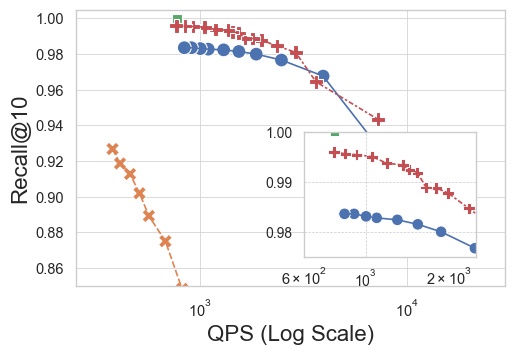

In [55]:
# corelation 1000
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [10638.3, 3937.01, 2475.25, 1869.16, 1540.83, 1300.39, 1095.29, 1003.01, 908.265, 838.926],
        "Recall": [0.9034, 0.9677, 0.9767, 0.98, 0.9815, 0.9824, 0.9828, 0.9831, 0.9836, 0.9836]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [3484.32, 1686.34, 1102.54, 818.331, 679.81, 565.611, 509.424, 458.505, 410.172, 377.358],
        "Recall": [0.485, 0.7393, 0.8098, 0.8484, 0.8751, 0.8893, 0.902, 0.9128, 0.9187, 0.9268]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 771.8],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7241.38, 3636.36, 2898.55, 2352.94, 1980.20, 1795.70, 1650.17, 1536.10, 1432.66, 1362.97, 1189.78, 1053.74, 925.93, 844.59, 768.64],
        "Recall": [0.9435, 0.9645, 0.981, 0.9847, 0.9878, 0.9888, 0.9889, 0.9919, 0.9925, 0.9934, 0.9938, 0.9951, 0.9955, 0.9957, 0.9960]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.975,1)
axins.set_xlim(600, 2.5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_83636/1841066313.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


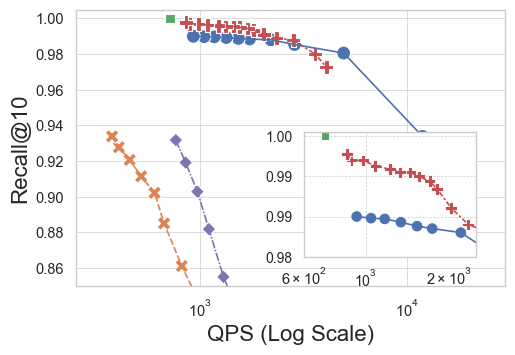

In [56]:
#PAPER  Coorelation 10000

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [11904.8, 4950.5, 2865.33, 2202.64, 1736.11, 1531.39, 1338.69, 1170.96, 1044.93, 927.644],
        "Recall": [0.9339, 0.9806, 0.9854, 0.988, 0.9885, 0.9888, 0.9893, 0.9897, 0.9898, 0.99]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4000, 1650.17, 1140.25, 816.327, 669.792, 602.41, 519.211, 456.621, 404.858, 375.375],
        "Recall": [0.5253, 0.7539, 0.8258, 0.8612, 0.8851, 0.9022, 0.9115, 0.9207, 0.9278, 0.9339]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 713.06],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4084.5, 3597.12, 2824.86, 2342.63, 2028.40, 1811.59, 1700.68, 1552.80, 1449.28, 1329.79, 1223.78, 1083.67, 980.39, 888.87, 854.70],
        "Recall": [0.9728, 0.9801, 0.9879, 0.989, 0.9911, 0.9934, 0.9944, 0.995, 0.9955, 0.9955, 0.9959, 0.9963, 0.997, 0.997, 0.9978]
    }, 
     "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 14285.7, 7936.51, 5025.13, 3891.06, 3125.00, 2604.17, 2247.19, 2016.13, 1782.53, 1650.17, 1297.92, 1103.75, 970.87, 851.71, 763.36],
        "Recall": [0.3026, 0.5226, 0.6244, 0.6832, 0.7251, 0.7525, 0.7754, 0.7966, 0.8137, 0.8271, 0.8551, 0.8819, 0.9029, 0.9192, 0.9318]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.985,1.0005)
axins.set_xlim(600, 2.5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_83636/3091262793.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


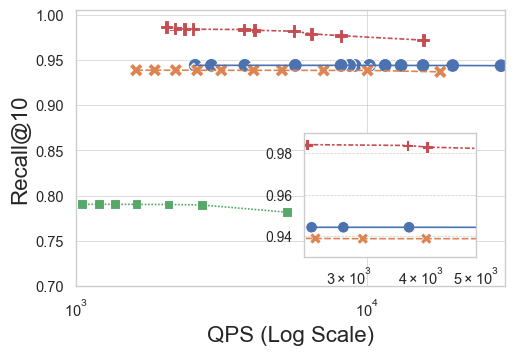

In [57]:
#Dedicated Solution TRIP CLICK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [68493.15, 28985.51, 19762.85, 15625, 13136.91, 11586.33, 10225.46, 9124.09, 8741.26, 8169.61, 5688.99, 3815.78, 2928.08, 2575.88, 2198.26],
        "Recall": [0.94122, 0.94384, 0.94401, 0.94405, 0.94408, 0.94413,  0.94415, 0.94416, 0.94417, 0.94418, 0.94419, 0.94421, 0.94421, 0.94421, 0.94421]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [17921.15, 10070.0, 7121.37, 5119.34, 4089.57, 3166.62, 2616.75, 2209.39, 1870.6, 1615.92],
        "Recall": [0.9370, 0.9386, 0.9386, 0.9387, 0.9387, 0.9387, 0.9388, 0.9388, 0.9388, 0.9388]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 5336.18, 2712.97, 2086.81, 1619.96, 1366.31, 1199.76, 1052.19, 939.408, 855.871, 783.392],
        "Recall": [ 0.7816, 0.7897, 0.7902, 0.7903, 0.7904, 0.7904, 0.7904, 0.7905, 0.7905, 0.7905]
    },
    "Query-aware ":   {
         "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.70, 1.005)
ax.set_xlim(1000, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.93,0.99)
axins.set_xlim(2500, 5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/3091262793.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


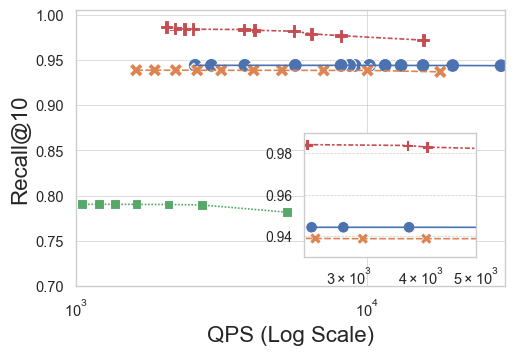

In [58]:
#Dedicated Solution TRIP CLICK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [68493.15, 28985.51, 19762.85, 15625, 13136.91, 11586.33, 10225.46, 9124.09, 8741.26, 8169.61, 5688.99, 3815.78, 2928.08, 2575.88, 2198.26],
        "Recall": [0.94122, 0.94384, 0.94401, 0.94405, 0.94408, 0.94413,  0.94415, 0.94416, 0.94417, 0.94418, 0.94419, 0.94421, 0.94421, 0.94421, 0.94421]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [17921.15, 10070.0, 7121.37, 5119.34, 4089.57, 3166.62, 2616.75, 2209.39, 1870.6, 1615.92],
        "Recall": [0.9370, 0.9386, 0.9386, 0.9387, 0.9387, 0.9387, 0.9388, 0.9388, 0.9388, 0.9388]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 5336.18, 2712.97, 2086.81, 1619.96, 1366.31, 1199.76, 1052.19, 939.408, 855.871, 783.392],
        "Recall": [ 0.7816, 0.7897, 0.7902, 0.7903, 0.7904, 0.7904, 0.7904, 0.7905, 0.7905, 0.7905]
    },
    "Query-aware ":   {
         "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.70, 1.005)
ax.set_xlim(1000, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.93,0.99)
axins.set_xlim(2500, 5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/2606444086.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


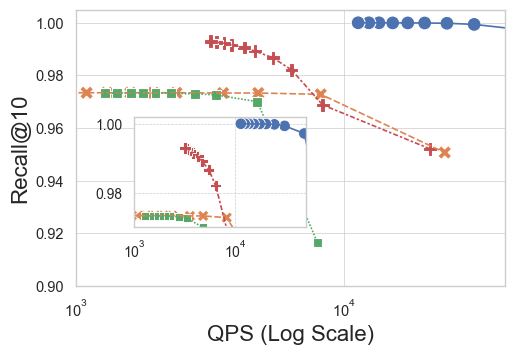

In [59]:
# Dedicated Solution For SIFT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [112359.55, 47846.41, 30581.35, 24213.08, 20000, 17301.04, 15197.57, 13513.51, 12387.46, 11299.44],
        "Recall": [0.94676, 0.99716, 0.99936, 0.9998, 0.9999, 0.99992, 0.99993, 0.99996, 0.99997, 0.99998]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [23753.44, 8200.16, 4796.18, 3546.10, 2375.89, 1950.90, 1599.74, 1308.07, 1099.32, 947.52],
        "Recall": [0.9507, 0.9728, 0.9733, 0.9733, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 7968.13, 4759.64, 3330, 2792.52, 2273.76, 1985.7, 1778.09, 1612.64, 1425.92, 1284.52],
        "Recall": [ 0.9165, 0.9700, 0.9726, 0.9730, 0.9732, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733]
    },
     "Query-aware ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(1000, 4e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="40%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.97,1.002)
axins.set_xlim(1000, 5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/3529341370.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


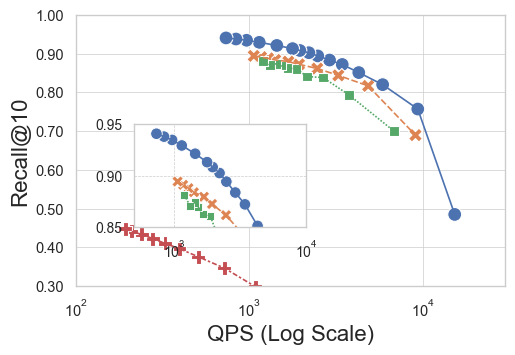

In [60]:
# Range Search Results
# VIDEO VIEWS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [15306, 9375, 5882, 4286, 3440, 2907, 2488, 2210, 1961, 1779, 1445, 1144, 967, 840, 736],
        "Recall": [0.4849, 0.7572, 0.8202, 0.8514, 0.8723, 0.8838, 0.8944, 0.9027, 0.9085, 0.9133, 0.9215, 0.9295, 0.9349, 0.9381, 0.9409]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9090.91, 4854.37, 3267.97, 2471.17, 1937.98, 1683.50, 1413.76, 1286.45, 1171.88, 1063.83],
        "Recall": [0.6898, 0.8170, 0.8441, 0.8618, 0.8727, 0.8797, 0.8841, 0.8881, 0.8913, 0.8945]
    },


     
    "Query-aware naive":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 6849.77, 3783.62, 2669.18, 2155.17, 1875.00, 1665.93, 1522.01, 1431.30, 1320.42, 1196.81],
        "Recall": [ 0.6997, 0.7929, 0.8385, 0.8411, 0.8612, 0.8627, 0.8697, 0.8741, 0.871, 0.8813]
    },
     "ACORN-1 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [2293.58, 1086.17, 719.08, 510.38, 397.14, 327.80, 278.24, 240.15, 209.85, 193.35],
        "Recall": [0.1851, 0.2983, 0.3464, 0.3753, 0.3963, 0.4101, 0.4225, 0.4332, 0.4410, 0.4482]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(100, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 10e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/3125379034.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


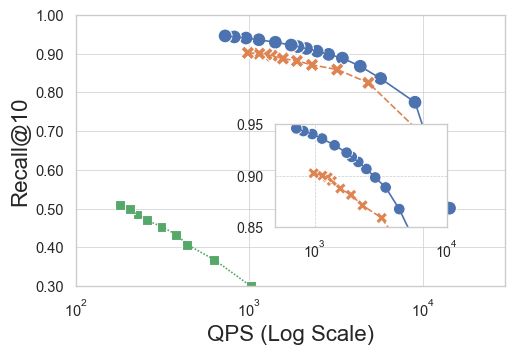

In [61]:
# Range Search Results
# VIDEO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9803.92, 4870.13, 3218.88, 2304.15, 1886.79, 1565.76, 1350.14, 1257.33, 1144.16, 983.61],
        "Recall": [0.6938, 0.8250, 0.8591, 0.8713, 0.8815, 0.8877, 0.8951, 0.8985, 0.9003, 0.9025]
    },

     "ACORN-1 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [2392.34, 1023.19, 629.723, 440.788, 380.904, 313.022, 258.665, 227.514, 205.677, 181.181],
        "Recall": [0.1515, 0.2996, 0.3679, 0.4067, 0.4328, 0.4533, 0.4695, 0.4847, 0.4983, 0.5085]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(100, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower right', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 10e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/2289830711.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


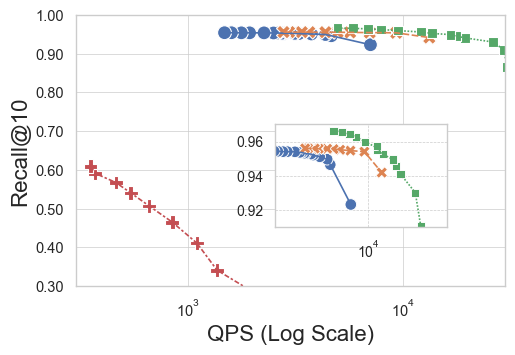

In [62]:
# Range Search Results
# AUDIO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Query-aware naive ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7064.71, 4643.97, 4360.47, 3750.00, 3280.35, 3138.91, 2803.74, 2737.23, 2604.17, 2500.00, 2259.04, 1935.48, 1771.78, 1593.56, 1479.37],
        "Recall": [0.9233, 0.9465, 0.9497, 0.9511, 0.9521, 0.9527, 0.9529, 0.9532, 0.9536, 0.9537, 0.9540, 0.9541, 0.9541, 0.9543, 0.9544]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [13274, 9317, 7009, 5682, 4967, 4360, 3667, 3386, 2953, 2783],
        "Recall": [0.9419, 0.9541, 0.9547, 0.9552, 0.9556, 0.9558, 0.9558, 0.9559, 0.9560, 0.9560]
    },

    "Proposed PF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097, 9494, 7895, 6881, 5837, 4967],
        "Recall": [ 0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526, 0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663]
    },


     "ACORN ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4615, 2517, 1366, 1100, 846, 660, 542, 462, 370, 352],
        "Recall": [0.1079, 0.2517, 0.3408, 0.4109, 0.4648, 0.5068, 0.5404, 0.5673, 0.5911, 0.6093]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(300, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower right', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.91,0.97)
axins.set_xlim(1500, 5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/3519036054.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


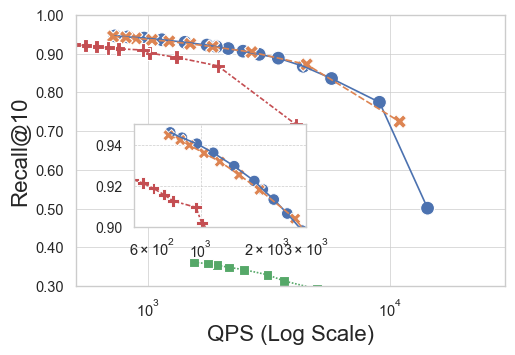

In [63]:
#Dedicated Range search
# Range Search Results
# VIDEO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed Query-aware PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [10948.9, 4518.07, 2673.8, 1845.02, 1491.05, 1220.5, 1035.2, 888.099, 807.754, 714.967],
        "Recall": [0.7247, 0.8723, 0.9042, 0.9182, 0.9255, 0.9319, 0.9360, 0.9399, 0.9424, 0.9447]
    },

     "SERF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
       
        "Time": [15000, 7772, 5000, 3649, 3112, 2488, 2164, 1929, 1760, 1548],
        "Recall": [0.1429, 0.2561, 0.2919, 0.3129, 0.3290, 0.3421, 0.3480, 0.3535, 0.3579, 0.3609],
    },
      "ACORN-\u03B3 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4087.19, 1937.98, 1306.62, 1012.15, 951.173, 750.375, 680.581, 610.749, 548.446, 494.56],
        "Recall": [0.7168, 0.8688, 0.8907, 0.9019, 0.9097, 0.9128, 0.9159, 0.9189, 0.9214, 0.9232] 
    },
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(500, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.90,0.95)
axins.set_xlim(500, 3e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





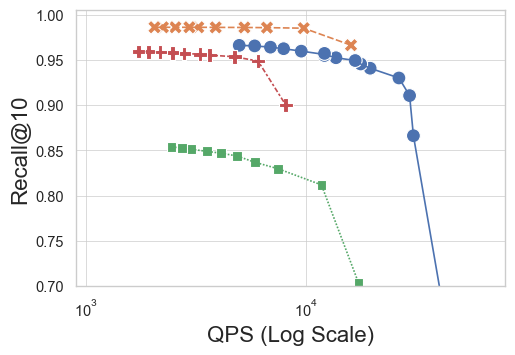

In [64]:
#Dedicated Range search
# Range Search Results
# AUDIO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
    "Proposed PF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097, 9494, 7895, 6881, 5837, 4967],
        "Recall": [ 0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526, 0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15957.4, 9740.26, 6637.17, 5244.76, 3886.01, 3239.74, 2952.76, 2551.02, 2238.81, 2051.98],
        "Recall": [0.9665, 0.9853, 0.9859, 0.9861, 0.9862, 0.9863, 0.9863, 0.9863, 0.9863, 0.9863]
    },

     "SERF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
       
        "Time": [17241, 11718, 7425, 5832, 4854, 4098, 3546, 3012, 2727, 2451],
        "Recall": [0.7037, 0.8119, 0.8299, 0.8370, 0.8439, 0.8470, 0.8490, 0.8513, 0.8529, 0.8538],
    },
      "ACORN-\u03B3 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [8064.52, 6048.39, 4731.86, 3649.64, 3296.7, 2788.1, 2471.17, 2173.91, 1925.55, 1736.11],
        "Recall": [0.9005, 0.9489, 0.9537, 0.9555, 0.9565, 0.9573, 0.9581, 0.9588, 0.9594, 0.9595] 
    },
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.7, 1.005)
ax.set_xlim(900, 8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
# axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
# sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
# sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

# axins.set_xscale("log")
# axins.set_ylim(0.90,0.95)
# axins.set_xlim(500, 3e3)
# axins.grid(True, linestyle="--", linewidth=0.5)
# axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



